# prewitt 수직 경계
- [1 0 -1]
- [1 0 -1]
- [1 0 -1]

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

src = cv2.imread('lenna.jpg',0)
dst = np.copy(src)
H,W = src.shape[:2]
N= 0.18

In [6]:
mask_size = 3
mask_V = np.ones((mask_size,mask_size)) 
for i in range (0,mask_size):
    mask_V[:,i] +=  - i
mask_V

array([[ 1.,  0., -1.],
       [ 1.,  0., -1.],
       [ 1.,  0., -1.]])

In [4]:
dst = cv2.filter2D(src, -1, kernel = mask_V)
dst = np.abs(dst)
m = np.min(dst)
M = np.max(dst)
thr = (M-m)*N
boundary_V = np.where(dst < thr, 0, 255)

# prewitt 수평 경계
- [-1-1-1]
- [ 0  0  0]
- [ 1  1  1]

In [5]:
mask_size = 3
mask_H = np.ones((mask_size,mask_size)) 
for i in range (0,mask_size):
    mask_H[i,:] +=  - i
mask_H = mask_H[::-1,:]
mask_H

array([[-1., -1., -1.],
       [ 0.,  0.,  0.],
       [ 1.,  1.,  1.]])

In [4]:
dst = cv2.filter2D(src, -1, kernel = mask_H)
dst = np.abs(dst)
m = np.min(dst)
M = np.max(dst)
thr = (M-m)*N
boundary_H = np.where(dst < thr, 0, 255)

# Roberts 수평 경계선
- [ -1 0 0]
- [ 0 1 0 ]
- [ 0 0 0 ]


In [9]:
mask_size = 3
mask_Rob_H = np.zeros((mask_size,mask_size)) 
mask_Rob_H[1,1] = 1
mask_Rob_H[0,0] = -1
mask_Rob_H

array([[-1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  0.]])

In [10]:
dst = cv2.filter2D(src, -1, kernel = mask_Rob_H)
dst = np.abs(dst)
m = np.min(dst)
M = np.max(dst)
thr = (M-m)*N
boundary_Rob_H = np.where(dst < thr, 0, 255)

# Roberts 수직 경계선
- [ 0 0 -1]
- [ 0 1 0 ]
- [ 0 0 0 ]

In [11]:
mask_size = 3
mask_Rob_V= np.zeros((mask_size,mask_size)) 
mask_Rob_V[1,1] = 1
mask_Rob_V[0,2] = -1
mask_Rob_V

array([[ 0.,  0., -1.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  0.]])

In [12]:
dst = cv2.filter2D(src, -1, kernel = mask_Rob_V)
dst = np.abs(dst)
m = np.min(dst)
M = np.max(dst)
thr = (M-m)*N

boundary_Rob_V = np.where(dst < thr, 0, 255)

# Sobel 수직 경계
- [ 1 0 -1]
- [ 2 0 -2]
- [ 1 0 -1]

In [13]:
mask_sob_V = np.ones((mask_size,mask_size)) 
for i in range (0,mask_size):
    mask_sob_V[:,i] +=  - i
mask_sob_V[(mask_size//2),0] = 2
mask_sob_V[(mask_size//2),mask_size-1] = -2
mask_sob_V = mask_sob_V[::-1,:]
mask_sob_V

array([[ 1.,  0., -1.],
       [ 2.,  0., -2.],
       [ 1.,  0., -1.]])

In [14]:
dst = cv2.filter2D(src, -1, kernel = mask_sob_V)
dst = np.abs(dst)
m = np.min(dst)
M = np.max(dst)
thr = (M-m)*N
boundary_sob_V = np.where(dst < thr, 0, 255)

# Sobel 수평 경계
- [-1 -2 -1]
- [ 0  0  0]
- [ 1 2 1  ]

In [15]:
mask_sob_H = np.ones((mask_size,mask_size))
for i in range (0,mask_size):
    mask_sob_H[i,:] +=  - i
mask_sob_H[0,(mask_size//2)] = 2
mask_sob_H[mask_size-1,(mask_size//2)] = -2
mask_sob_H = mask_sob_H[::-1,:]
mask_sob_H

array([[-1., -2., -1.],
       [ 0.,  0.,  0.],
       [ 1.,  2.,  1.]])

In [16]:
dst = cv2.filter2D(src, -1, kernel = mask_sob_H)
dst = np.abs(dst)
m = np.min(dst)
M = np.max(dst)
thr = (M-m)*N
boundary_sob_H = np.where(dst < thr, 0, 255)

# 각 수평 경계선, 수직 경계선 출력

Text(0.5, 1.0, 'Sobel_H')

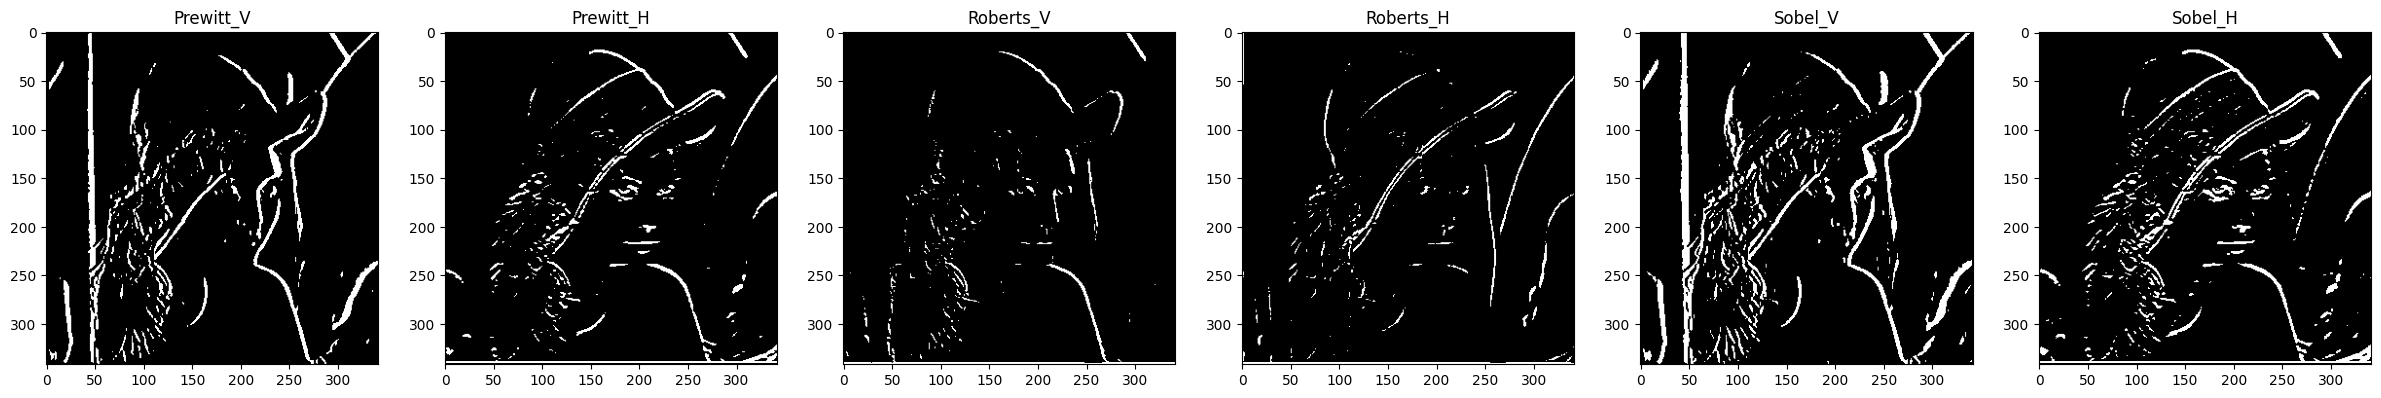

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(30,5))
axes[0].imshow(boundary_V, cmap = 'gray')
axes[0].set_title('Prewitt_V')
axes[1].imshow(boundary_H, cmap = 'gray')
axes[1].set_title('Prewitt_H')
axes[2].imshow(boundary_Rob_V, cmap = 'gray')
axes[2].set_title('Roberts_V')
axes[3].imshow(boundary_Rob_H, cmap = 'gray')
axes[3].set_title('Roberts_H')
axes[4].imshow(boundary_sob_V, cmap = 'gray')
axes[4].set_title('Sobel_V')
axes[5].imshow(boundary_sob_H, cmap = 'gray')
axes[5].set_title('Sobel_H')


In [19]:
boundary_all=(((boundary_H**2)+(boundary_V**2))**1/2)
boundary_Rob_all = (((boundary_Rob_V**2)+(boundary_Rob_H**2))**1/2)
boundary_sob_all = (((boundary_sob_V**2)+(boundary_sob_H**2))**1/2)

Text(0.5, 1.0, 'Sobel')

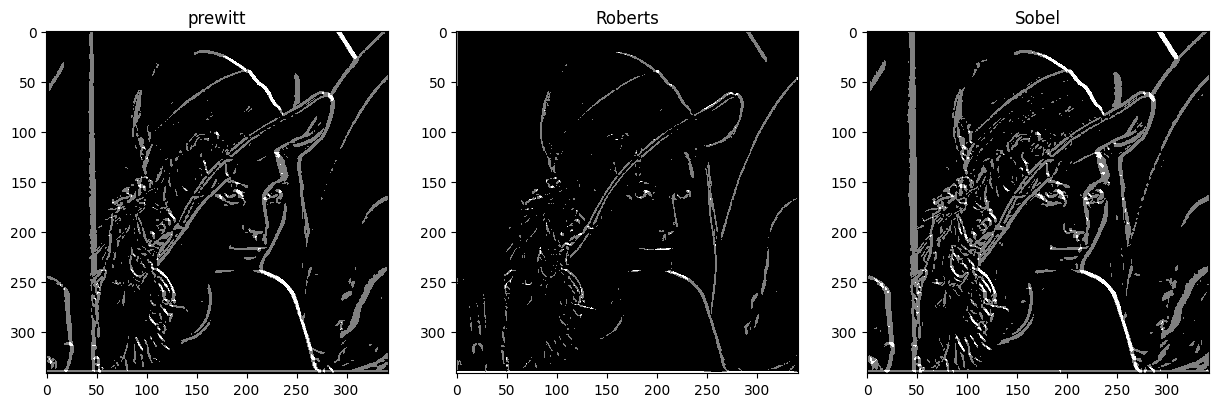

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
axes[0].imshow(boundary_all, cmap = 'gray')
axes[0].set_title('prewitt')
axes[1].imshow(boundary_Rob_all, cmap = 'gray')
axes[1].set_title('Roberts')
axes[2].imshow(boundary_sob_all, cmap = 'gray')
axes[2].set_title('Sobel')

# Border detection using canny
- 경계 max threshould 보다 크면 경계

canny edge detection
cv2.canny(image, threshold1,threshold2)

In [76]:
import cv2
gray_img = cv2.imread('lenna.jpg', cv2.IMREAD_GRAYSCALE)

threshold1 = 0
threshold2 = 100
edge_img = cv2.Canny(gray_img, threshold1, threshold2)

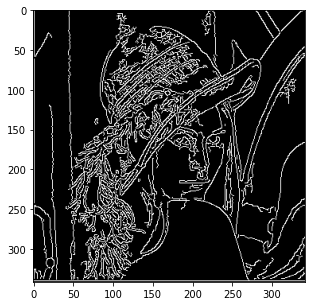

In [77]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
axes.imshow(edge_img, cmap = 'gray')